In [23]:
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.vgg19 import preprocess_input
import os
model = tf.keras.models.load_model("model.h5", compile=False)

def predict_picture(image_path):
    class_names = {0: 'Cat', 1: 'Dog'}

    # Load the image using PIL's Image module
    img = Image.open(image_path).convert('RGB')
    img = img.resize((224, 224))  # Resize the image if needed

    # Convert the image to an array
    img_array = np.array(img)

    # Preprocess the image using VGG19's preprocess_input function
    preprocessed_img = preprocess_input(img_array)

    # Reshape the image to match the expected input shape of the VGG16 model
    preprocessed_img = np.expand_dims(preprocessed_img, axis=0)

    # Predict the image
    prediction = model.predict(preprocessed_img)
    index = np.argmax(prediction)
    class_name = class_names[index]
    confidence_score = prediction[0][index]

    # Display the top predictions
    print(f"Image Category: {class_name}")
    print(f"Confidence Score: {confidence_score:.4f}")


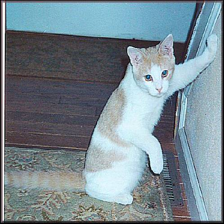

1/1 [==============================] - 2s 2s/step
Image Category: Cat
Confidence Score: 1.0000


In [24]:
image_path = r'D:\Onedrive\OneDrive - VNU-HCMUS\Storage\Intern\Dataset\test_set\test_set\cats\cat.4001.jpg'
img = Image.open(image_path).convert('RGB')
img = img.resize((224, 224))
display(img)
predict_picture(image_path)